# Monkey ECoG Data looking at the CV 

Goal: 
examine the difference in coefficient varience to look at the differences within and between each states.
[scientific programming edition]

In [1]:
# Setup 
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

In [2]:
def getECoGdata(mydata_path, session_num, chan):
    if "Session" not in mydata_path:
        raise DataError("check data!")
    data_path = mydata_path % (session_num)
    matfile = io.loadmat(data_path + 'ECoG_ch%d.mat'%(chan), squeeze_me=True)
    timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
    data = matfile['ECoGData_ch%d'%(chan)]
    return data

In [3]:
data_path ="\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\"
getECoGdata(data_path, 1, 1)

array([119, 139, 153, ...,  30,  54,  61], dtype=int16)

In [15]:
def getTimeFile(mydata_path, session_num):
    if "Session" not in mydata_path:
        raise DataError("check data!")
    data_path = mydata_path % (session_num)
    timefile = io.loadmat(data_path + 'Condition.mat', squeeze_me=True)
    return timefile

In [5]:
getTimeFile(data_path, 1)

{'ConditionIndex': array([  12279,  908909, 1007108, 1927428]),
 'ConditionLabel': array(['AwakeEyesOpened-Start', 'AwakeEyesOpened-End',
        'AwakeEyesClosed-Start', 'AwakeEyesClosed-End'], dtype=object),
 'ConditionTime': array([   12.278,   908.908,  1007.107,  1927.427]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jun 09 23:48:49 2014',
 '__version__': '1.0'}

In [7]:
def conditionInfo(timefile):
    print(timefile['ConditionLabel'])

In [8]:
# get an idea of the conditions in each session
timefile1 = getTimeFile(data_path, 1)
conditionInfo(timefile1)
timefile2 = getTimeFile(data_path, 2)
conditionInfo(timefile2)
timefile3 = getTimeFile(data_path, 3)
conditionInfo(timefile3)

['AwakeEyesOpened-Start' 'AwakeEyesOpened-End' 'AwakeEyesClosed-Start'
 'AwakeEyesClosed-End']
['AnestheticInjection' 'Anesthetized-Start' 'Anesthetized-End'
 'RecoveryEyesClosed-Start' 'RecoveryEyesClosed-End']
['RecoveryEyesOpened-Start' 'RecoveryEyesOpened-End']


In [26]:
def getSP(data, start, end, fs, nperseg, noverlap):
    f_axis, f_time, spg = sig.spectrogram(data, fs, nperseg, noverlap)
    SP = spg[:,np.intersect1d(np.where(f_time>start),np.where(f_time<end))]
    return SP

In [27]:
def getStart(timefile, start_ind):
    return timefile['ConditionTime'][start_ind]

In [28]:
# getting the end index
def getEnd(timefile, end_ind):
    return timefile['ConditionTime'][end_ind]

In [29]:
# getting the cv value
def scv(SP):
    return ((np.std(SP,axis=1)/np.mean(SP,axis=1))**2)

In [30]:
# plotting the scv
def plotScv(SP):
    plt.loglog(np.std(SP,axis=1)/np.mean(SP,axis=1))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('CV')

In [31]:
# plotting the psd
def pltPsd(data, start, end, session_num, fs, nperseg, noverlap):
    f_axis, f_time, spg = sig.spectrogram(data, fs, nperseg, noverlap)
    if num == 1:
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][2]),np.where(f_time<timefile['ConditionTime'][3]))],axis=1))
    elif (num == 2):
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][1]),np.where(f_time<timefile['ConditionTime'][2]))],axis=1))
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][3]),np.where(f_time<timefile['ConditionTime'][4]))],axis=1))
    elif num == 3:
        plt.loglog(np.mean(spg[:,np.intersect1d(np.where(f_time>timefile['ConditionTime'][0]),np.where(f_time<timefile['ConditionTime'][1]))],axis=1))

['AwakeEyesOpened-Start' 'AwakeEyesOpened-End' 'AwakeEyesClosed-Start'
 'AwakeEyesClosed-End']


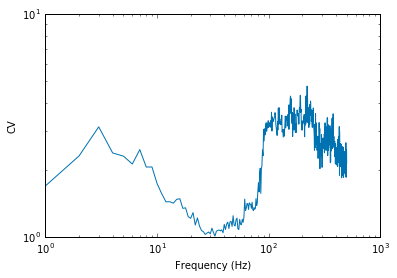

In [33]:
# example for session 1 channel 1
data_path ="\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\"
s1ch1dat = getECoGdata(data_path, 1, 1)
tf1 = getTimeFile(data_path, 1)
conditionInfo(tf1)
s1start = getStart(tf1, 0)
s1end = getEnd(tf1, 1)
s1ch1SP = getSP(s1ch1dat, s1start, s1end, 1000, 1000, 500)
scv(s1ch1SP)
plotScv(s1ch1SP)

['AwakeEyesOpened-Start' 'AwakeEyesOpened-End' 'AwakeEyesClosed-Start'
 'AwakeEyesClosed-End']


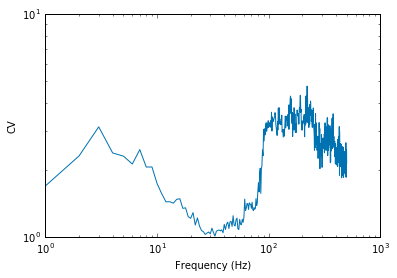

In [35]:
# by session
data_path ="\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\"
s1chdat = getECoGdata(data_path, 1, 1)
tf1 = getTimeFile(data_path, 1)
conditionInfo(tf1)
s1start1 = getStart(tf1, 0)
s1end1 = getEnd(tf1, 1)
s1ch1SP = getSP(s1ch1dat, s1start1, s1end1, 1000, 1000, 500)
scv(s1ch1SP)
plotScv(s1ch1SP)



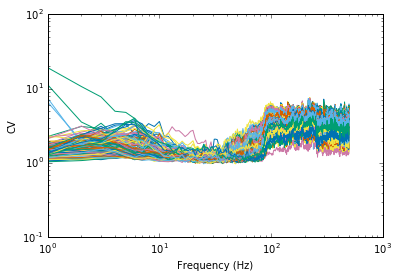

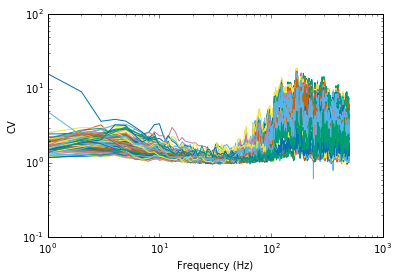

In [44]:
# session 1
data_path ="\\Users\\Lauren\\Data\\20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128\\Session%d\\"
for i in range(1,129):
    data = getECoGdata(data_path,1,i)
    tf1 = getTimeFile(data_path, 1)    
    # AwakeEyesOpened
    s1start = getStart(tf1, 0)
    s1end = getEnd(tf1, 1)
    s1SP1 = getSP(data, s1start1, s1end1, 1000, 1000, 500)
    scv(s1SP1)
    plt.figure(1)
    plotScv(s1SP1)
    # AwakeEyesClosed
    s1start2 = getStart(tf1, 2)
    s1end2 = getEnd(tf1, 3)
    s1SP2 = getSP(data, s1start2, s1end2, 1000, 1000, 500)
    scv(s1SP2)
    plt.figure(2)
    plotScv(s1SP2)